In [4]:
# Importing libraries

import librosa
import os
import numpy as np
import matplotlib.pyplot as plt

In [182]:
# Extract features from the dataset 
# Function to extract features from audio files

def feature_extractor(file):
    features={}
    y,sr=librosa.load(file,res_type='kaiser_fast')
    features['chroma_stft']=np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    features['spec_cent'] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    features['spec_flatness'] = np.mean(librosa.feature.spectral_flatness(y=y))
    features['tonnetz'] = np.mean(librosa.feature.tonnetz(y=y, sr=sr))
    features['mfcc'] = np.mean(librosa.feature.mfcc(y=y, sr=sr,n_mfcc=12))
    features['tempo']=np.mean(float(librosa.beat.plp(y=y, sr=sr)[0]))
    return features
    
    

In [183]:
import pandas as pd
directory = "C:\\Users\\Mudra\\Downloads\\musicData\\genres"
extracted_features=[]
labels=[]
for folder in os.listdir(directory):
    if os.path.isdir(os.path.join(directory,folder)):
        for file in os.listdir(os.path.join(directory,folder)): 
            feature=feature_extractor(os.path.join(directory,folder,file))
            extracted_features.append(feature)
            labels.append(folder)


In [184]:
# Make a dataframe for extracted features

import pandas as pd
extracted_features_df=pd.DataFrame.from_dict(extracted_features)
extracted_features_df['Genre']=labels
extracted_features_df.head()

,chroma_stft,spec_cent,spec_flatness,tonnetz,mfcc,tempo,Genre
0,0.350129,1784.122641,0.004496,0.006428,3.687160,0.000000,blues
1,0.340849,1530.261767,0.002298,0.029378,0.177783,0.099734,blues
2,0.363538,1552.832481,0.002635,0.024224,4.386240,0.000000,blues
3,0.404854,1070.153418,0.000955,0.026662,1.145649,0.580107,blues
4,0.308526,1835.128513,0.003240,-0.020945,-9.879579,0.000000,blues


In [185]:
# Normalise the features

from sklearn.preprocessing import StandardScaler
X,y = extracted_features_df.values[:,:-1], extracted_features_df.values[:,-1]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [186]:
# Map the values of genres

mapping = {
    "blues": 0,
    "classical": 1,
    "country": 2,
    "disco": 3,
    "hiphop": 4,
    "jazz": 5,
    "metal": 6,
    "pop": 7,
    "reggae": 8,
    "rock": 9,
}
y=np.array([mapping[i] for i in y])

In [187]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [195]:
# Build and train the model

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

In [196]:
score

0.385

Text(0, 0.5, 'Score')

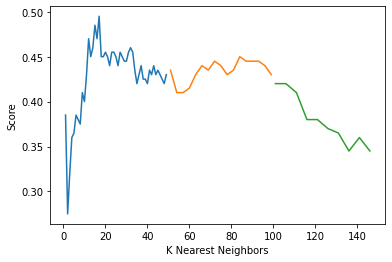

In [190]:
# Try different windows and textures

w_l = [1, 51, 101]
w_r = [50, 100, 150]
tx = [1, 3, 5]

for j in range(3):
    scores = []
    for i in range(w_l[j],w_r[j],tx[j]):
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(X_train, y_train)
        scores.append(classifier.score(X_test, y_test))
    plt.plot(range(w_l[j], w_r[j], tx[j]),scores)

plt.xlabel("K Nearest Neighbors")
plt.ylabel("Score")

In [191]:
# Import scikit-learn metrics module for accuracy calculation

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
predicted = classifier.predict(y_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

ValueError: Expected 2D array, got 1D array instead:
array=[6 1 0 8 0 5 9 6 7 6 6 6 6 3 3 9 9 5 1 5 6 6 5 9 6 3 8 0 7 9 3 1 3 6 6 7 0
 9 6 5 2 5 7 3 7 8 5 1 1 8 1 6 8 5 9 7 8 7 8 4 2 9 9 8 2 3 1 9 1 4 7 1 1 8
 1 8 9 2 0 3 2 2 9 8 3 2 6 5 6 9 9 9 9 5 6 0 8 6 2 2 2 4 9 7 0 3 3 8 6 2 1
 7 3 6 9 8 9 3 1 1 0 2 2 1 2 6 4 3 4 7 3 7 1 7 8 4 0 7 3 5 8 3 0 9 0 5 6 0
 9 2 0 9 6 1 7 5 5 3 1 4 0 2 1 4 1 6 2 4 6 0 2 2 1 5 9 7 9 0 4 9 5 8 0 1 3
 4 9 8 6 6 3 7 6 9 0 5 1 1 8 5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [192]:
# Perform PCA to reduce dimensionality

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_principal = pca.transform(X_train)
X_test_principal = pca.transform(X_test)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print(X_train_principal)

Explained variation per principal component: [0.46805387 0.16544091]
[[-0.12973223 -0.65695063]
 [ 0.78150618 -0.65671811]
 [ 1.34784269  2.14600698]
 ...
 [-1.08878204 -0.44937195]
 [-2.1982053  -0.63095952]
 [ 2.48627577 -1.02956698]]


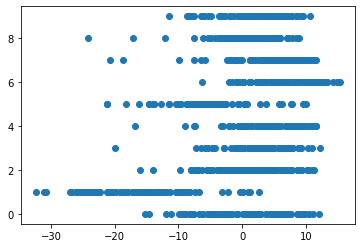

In [193]:
# Visualize the feature vs genres

plt.scatter(extracted_features_df['mfcc'], y)
plt.show()

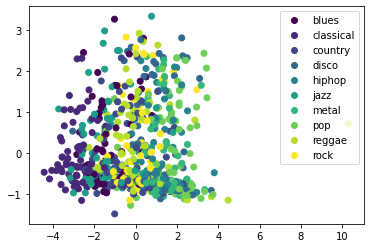

In [194]:
# Visualize the PCA results

plot = plt.scatter(X_train_principal[:,0], X_train_principal[:,1], c=y_train)
plt.legend(handles=plot.legend_elements()[0], labels=list(mapping.keys()))
plt.show()